In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam, RMSprop
from keras.utils.np_utils import to_categorical
import keras.backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import add_dummy_feature
from sklearn.metrics import f1_score

import seaborn as sns

In [10]:
df = pd.read_csv('../data/wines.csv')
X = scale(df.drop('Class', axis = 1).values)
y = to_categorical(df['Class'].values - 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [55]:
checkpoint = ModelCheckpoint(filepath="checkpoint.txt")
early = EarlyStopping(min_delta=0.0001, monitor="val_loss")
tb = TensorBoard(log_dir='./tb/', write_images=True, write_graph=True, write_grads=True)

In [56]:
input = Input(shape=(13,))
layer1 = Dense(8, activation="relu")(input)
layer2 = Dense(5, activation="relu")(layer1)
layer3 = Dense(2, activation="relu")(layer2)
output = Dense(3, activation="softmax")(layer3)
model = Model(input, output)
model.compile(Adam(lr=0.1), 'categorical_crossentropy', metrics=['accuracy'])
model.fit(
    X_train, 
    y_train, 
    epochs=40, 
    validation_data=(X_test, y_test), 
    callbacks=[checkpoint, tb])

Train on 142 samples, validate on 36 samples
Epoch 1/40
142/142 [==============================] - 0s - loss: 0.9517 - acc: 0.5282 - val_loss: 0.4178 - val_acc: 0.8889
Epoch 2/40
142/142 [==============================] - 0s - loss: 0.4600 - acc: 0.9014 - val_loss: 0.2121 - val_acc: 0.9722
Epoch 3/40
142/142 [==============================] - 0s - loss: 0.1704 - acc: 0.9859 - val_loss: 0.0987 - val_acc: 0.9722
Epoch 4/40
142/142 [==============================] - 0s - loss: 0.1380 - acc: 0.9648 - val_loss: 0.1039 - val_acc: 0.9722
Epoch 5/40
142/142 [==============================] - 0s - loss: 0.1090 - acc: 0.9718 - val_loss: 0.0413 - val_acc: 1.0000
Epoch 6/40
142/142 [==============================] - 0s - loss: 0.0777 - acc: 0.9789 - val_loss: 0.0202 - val_acc: 1.0000
Epoch 7/40
142/142 [==============================] - 0s - loss: 0.0673 - acc: 0.9859 - val_loss: 0.0159 - val_acc: 1.0000
Epoch 8/40
142/142 [==============================] - 0s - loss: 0.0688 - acc: 0.9789 - val_lo

In [26]:
y_pred = model.predict(X_test)
y_test_cat = np.argmax(y_test, axis=1)
y_test_cat

array([1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2], dtype=int64)

In [29]:
features = K.function([input], [layer3])([X_test])[0]

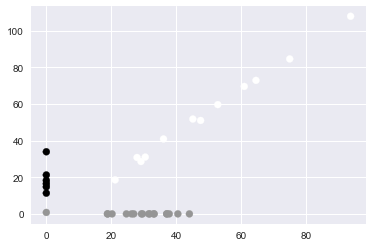

In [30]:
plt.scatter(features[:, 0], features[:, 1], c=y_test_cat)

======================== Exercise 4 - callbacks ======================